In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import metrics
warnings.filterwarnings("ignore")

from lifelines import KaplanMeierFitter

tongue = pd.read_csv("tongue.csv")

#print(tongue.dtypes)
#print(tongue.head)

f = tongue.type==1
T = tongue[f]['time']
C = tongue[f]['delta']

print(f.dtypes)
print(T.dtypes)
print(C.dtypes)


bool
int64
int64


bool
int64
int64


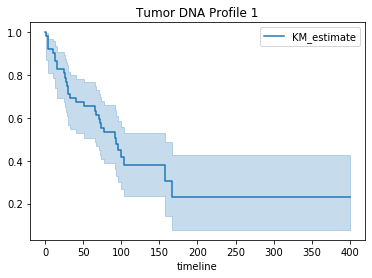

In [4]:
kmf = KaplanMeierFitter()

kmf.fit(T, event_observed=C)


kmf.plot(title='Tumor DNA Profile 1')

f2 = tongue.type==2
T2 = tongue[f2]['time']
C2 = tongue[f2]['delta']

print(f2.dtypes)
print(T2.dtypes)
print(C2.dtypes)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.79 0.09      3.40

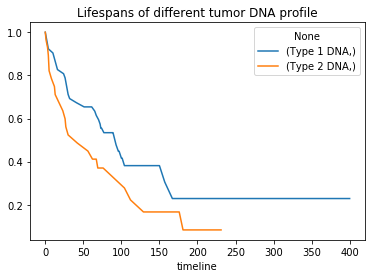

In [5]:
ax = plt.subplot(111)

kmf.fit(T, event_observed=C, label=['Type 1 DNA'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T2, event_observed=C2, label=['Type 2 DNA'])
kmf.survival_function_.plot(ax=ax)

plt.title('Lifespans of different tumor DNA profile')

kmf2 = plt.gcf()

from lifelines.statistics import logrank_test


results = logrank_test(T, T2, event_observed_A=C, event_observed_B=C2, alpha=.99)
results.print_summary()
